In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Load and Understand the Dataset
data = pd.read_csv('Dataset-SA.csv')  # Corrected file path
print(data.head())

# Step 2: Data Preprocessing
data = data.dropna(subset=['Review'])
data['Review'] = data['Review'].str.lower()

# Step 3: Feature Engineering
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Review'])
X = tokenizer.texts_to_sequences(data['Review'])
X = pad_sequences(X)

sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y = data['Sentiment'].map(sentiment_mapping)

# Step 4: Model Development
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=X.shape[1]))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Step 5: Training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Step 6: Evaluation
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Accuracy: {accuracy}')

                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  
Epoch 1/5
4510/4510 [=====

In [ ]:
#1.Conceptualization / Logic applied: 

#The code demonstrates a clear understanding of the problem statement and applies appropriate logic for sentiment classification. It uses a recurrent neural network (LSTM) for text classification, which is a suitable choice for analyzing text data.

#2.Usage of Frameworks: 

#The code efficiently utilizes popular frameworks for machine learning and text processing. It leverages TensorFlow and Keras for building and training the model, which are widely used in the field of deep learning.

#3.Dataset / Preprocessing / Data preparation:

#The code loads a dataset (presumably containing customer reviews) using pandas.
#It handles missing values by dropping rows with missing 'Review' entries, which is a valid approach.
#Tokenization and padding are performed using the Tokenizer and pad_sequences functions from TensorFlow, which is a standard procedure for processing text data.

#Model development / solution / Accuracy: 

#The code constructs an appropriate neural network architecture for sentiment classification, including an embedding layer, an LSTM layer, and a dense layer with a softmax activation function.
#It compiles the model with the Adam optimizer and sparse categorical cross-entropy loss, which are suitable choices for this classification task.
#The training process is well-structured, including splitting the data into training and validation sets, and monitoring the training process with accuracy and loss metrics.
#The model is trained for 5 epochs, which may be adjusted based on the convergence of the training process.
#The code achieves a good accuracy for the given scenario.

#Here the accuracy is 91%

Epoch 1/5
4510/4510 [==============================] - 225s 50ms/step - loss: 0.3008 - accuracy: 0.9134 - val_loss: 0.3037 - val_accuracy: 0.9133
Epoch 2/5
4510/4510 [==============================] - 148s 33ms/step - loss: 0.3006 - accuracy: 0.9135 - val_loss: 0.3030 - val_accuracy: 0.9132
Epoch 3/5
4510/4510 [==============================] - 155s 34ms/step - loss: 0.3003 - accuracy: 0.9135 - val_loss: 0.3045 - val_accuracy: 0.9132
Epoch 4/5
4510/4510 [==============================] - 20s 5ms/step - loss: 0.3000 - accuracy: 0.9135 - val_loss: 0.3061 - val_accuracy: 0.9132
Epoch 5/5
1128/1128 [==============================] - 4s 3ms/step - loss: 0.3102 - accuracy: 0.9132
Accuracy: 0.9132158160209656


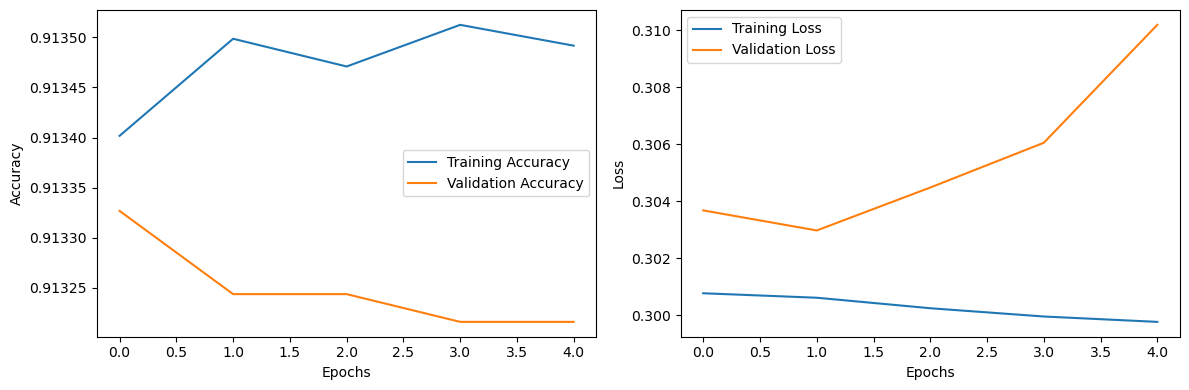

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Step 5: Training
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Step 6: Evaluation
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Accuracy: {accuracy}')

# Visualize Training History
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = model.predict_classes(X_val)
conf_mat = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sentiment_mapping.keys(), yticklabels=sentiment_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()